<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.linear_model  import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.dummy import DummyRegressor

Получение данных

In [2]:
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

Обзор датасетов

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Столбец с датой приведен в неудобном формате

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

**Обработка пропусков**

Доля пропусков

In [6]:
(df_full.isna().mean().loc[lambda x:x>0]*100)\
    .to_frame()\
    .rename(columns ={0:'space'})\
    .query('space > 1')\
    ['space'].sort_values(ascending = False)

secondary_cleaner.output.tail_sol           8.992232
rougher.input.floatbank11_xanthate          2.330367
rougher.state.floatbank10_e_air             2.242914
primary_cleaner.output.concentrate_sol      1.903390
secondary_cleaner.state.floatbank2_a_air    1.131745
final.output.concentrate_sol                1.085447
Name: space, dtype: float64

In [7]:
(df_train.isna().mean().loc[lambda x:x>0]*100)\
    .to_frame()\
    .rename(columns ={0:'space'})\
    .query('space > 1')\
    ['space'].sort_values(ascending = False)

secondary_cleaner.output.tail_sol           11.343558
rougher.state.floatbank10_e_air              3.081490
rougher.input.floatbank11_xanthate           3.024949
primary_cleaner.output.concentrate_sol       2.021344
secondary_cleaner.state.floatbank2_a_air     1.533677
final.output.concentrate_sol                 1.491271
rougher.input.feed_size                      1.017740
Name: space, dtype: float64

In [8]:
(df_test.isna().mean().loc[lambda x:x>0]*100)\
    .to_frame()\
    .rename(columns ={0:'space'})\
    .query('space > 1')\
    ['space'].sort_values(ascending = False)

Series([], Name: space, dtype: float64)

По условию пропуски это повтор предыдущих значений

In [9]:
# заполнение пропусков значениями, которые предшествует пропускам
df_full= df_full.fillna(method='ffill')
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

**Изменение типа в столбце даты**

In [10]:
df_full['date'] = pd.to_datetime(df_full['date'],format = '%Y-%m-%d %H:%M:%S')
df_train['date'] = pd.to_datetime(df_train['date'],format = '%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'],format = '%Y-%m-%d %H:%M:%S')

## Анализ данных

**Проверка правильности расчета обогащения**

In [11]:
recovery_theory = df_train['rougher.output.concentrate_au'] * \
    (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])/ \
    (df_train['rougher.input.feed_au'] * \
    (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) *100

In [12]:
mae = mean_absolute_error(df_train['rougher.output.recovery'],recovery_theory)
print('Ошибка эффективности обогащения:',mae)


Ошибка эффективности обогащения: 9.73512347450521e-15


Ошибка очень мала, что говорит о правильной работе установки по обогащению

**Обзор различий в тестовой выборке и тренеровочной**

In [13]:
print ("Размерность полных данных:", df_full.shape)
print ("Размерность тренировочных  данных:", df_train.shape)
print ("Размерность тестовых данных:", df_test.shape)

Размерность полных данных: (19439, 87)
Размерность тренировочных  данных: (14149, 87)
Размерность тестовых данных: (5290, 53)


**Добавление целевых признаков из полного датасета в тестовый датасет**

In [14]:
df_test = df_test.merge(df_full[['date','final.output.recovery','rougher.output.recovery']],on ='date',how = 'left')

**Удаление признаков в тренировочных данных, которые отсутствуют в тестовом датасете**

Некоторые перенные будут получены на этапах технологического процесса, поэтому к ним нет доступа.

In [15]:
df_exception = df_train
for column in df_test.columns:
    df_exception = df_exception.drop(column,axis = 1)
df_exception.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 32 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.tail_ag                                14149 non-null  float64
 5   final.output.tail_pb                                14149 non-null  float64
 6   final.output.tail_sol                               14149 non-null  float64
 7   final.output.tail_au                                14149 non-null  float64
 8   primary_cleaner.output.concentrate_ag               14149 non-null  float64


**Описание признаков отсутствующих в наборе**
* rougher.output.concentrate — концентрация после флотации
* rougher.output.tail - содержание отвальных хвостов
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Все отсутствующие признаки это выходные признаки получаемые в ходе прохождения технологического процесса.

Наша задача в том чтобы по входным параметрам сырья и внутреним параметрам при котором работает технологический процесс (объем воздуха, скорость подачи сырья и т.п.) предсказать выход полезного компонента. Так как тренировочный набор сформирован и из полного там присутствуют признаки полученные в ходе прохождения технологического процесса

In [16]:
for column in df_train.columns:
    if column not in df_test.columns:
        df_train = df_train.drop(column,axis = 1)

In [17]:
df_train.shape

(14149, 55)

# Анализ содержания концентраций металлов на каждом этапе

Создание списков концентрации металлов на каждом этапе обработки сырья 

In [18]:
au = ['rougher.input.feed_au',
      'rougher.output.concentrate_au',
      'primary_cleaner.output.concentrate_au',
      'final.output.concentrate_au']

ag = ['rougher.input.feed_ag',
      'rougher.output.concentrate_ag',
      'primary_cleaner.output.concentrate_ag',
      'final.output.concentrate_ag']

pb = ['rougher.input.feed_pb',
      'rougher.output.concentrate_pb',
      'primary_cleaner.output.concentrate_pb',
      'final.output.concentrate_pb']

metals =[au,ag,pb]

In [19]:
def concentration(metal,stages_of_metal):
    for stage in stages_of_metal:
        df_full[stage].hist(figsize = (15,5),bins = 30,alpha = 0.85)   
    plt.title(metal)
    plt.legend(['Руда','Концентрация после флотации','Первый этап ','Уровень конечной концентрации']) 
    plt.xlabel('Уровень содержания металла')
    plt.ylabel('Частота встречающегося уровня  содержания металла')
    

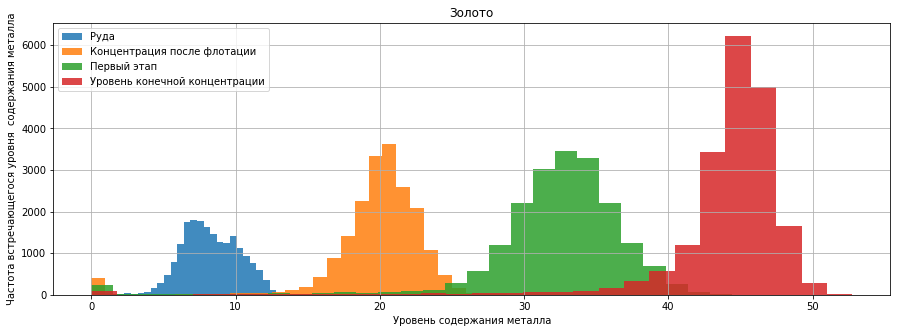

In [20]:
concentration('Золото',au)

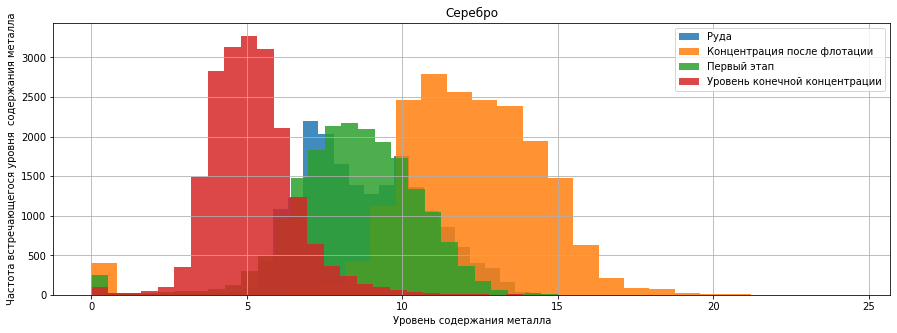

In [21]:
concentration('Серебро',ag)

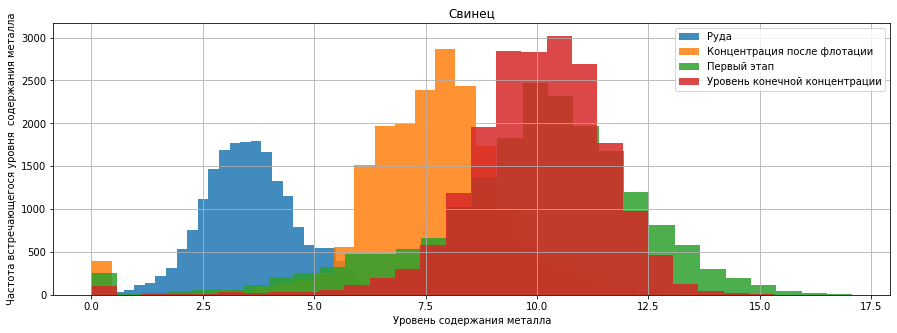

In [22]:
concentration('Свинец',pb)

Наблюдается  ожидаемая тенденция к росту целевого компонента (золота) с повышением этапа переработки

Присутствую нулевые значения концентраций на всех этапах кроме руды

**Распределения размеров гранул на обучающей и тестовой выборках**

Получение названия столбцов отвечающих за размер гранул

In [23]:
for column in df_test.columns:
    if 'feed_size' in column:
        print ('Название столбца, содержащий размер гранул:',column) 

Название столбца, содержащий размер гранул: primary_cleaner.input.feed_size
Название столбца, содержащий размер гранул: rougher.input.feed_size


График плотности вероятности

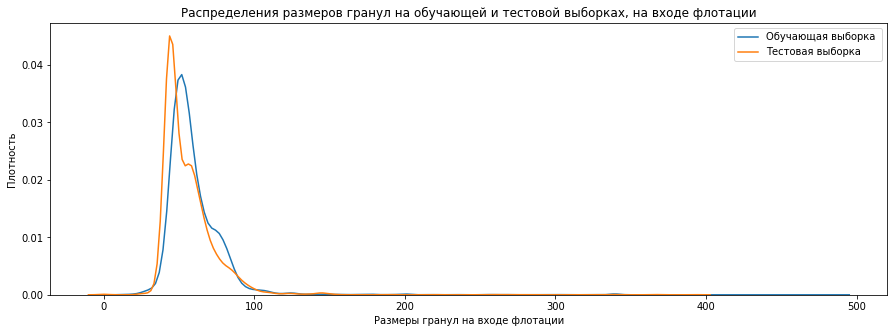

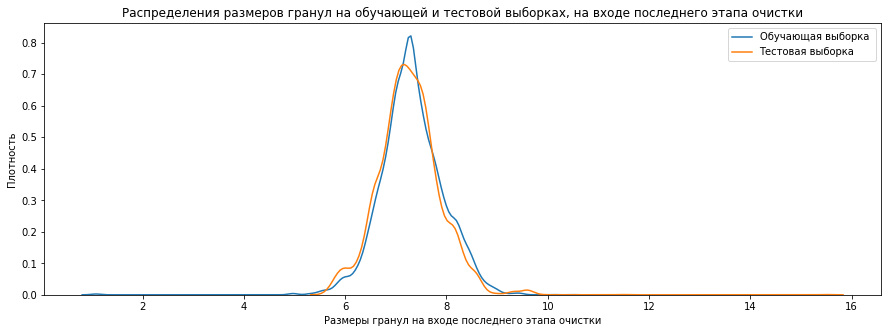

In [24]:
stages_with_feed_size  = ['rougher.input.feed_size','primary_cleaner.input.feed_size',]
translate_stages =['на входе флотации','на входе последнего этапа очистки']

for feed_size,stage in zip(stages_with_feed_size,translate_stages):
    plt.figure(figsize = (15,5)) 
    sns.kdeplot(df_train[feed_size])
    sns.kdeplot(df_test[feed_size])
    plt.title('Распределения размеров гранул на обучающей и тестовой выборках, ' + stage)
    plt.xlabel('Размеры гранул ' + stage)
    plt.ylabel('Плотность')
    plt.legend(['Обучающая выборка ','Тестовая выборка'])
    

Наблюдаем:
* Уменьшение размеров гранул
* Схожие  распределения указывает на то, что тренировочная выборка сформирована  правильно, так как повторяет структуру распределения размеров гранул на тестовой. 

**Суммарная концентрация всех веществ**

In [25]:
# до флотации
rougher_input = pd.Series(df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb']
                          + df_full['rougher.input.feed_sol'])

# после флотации
rougher_output =  pd.Series(df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag']
                            + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol'])

# итоговая концентрация
final = pd.Series(df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag']
                            + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol'])

Сводная таблица основных параметров распределения

In [26]:
concentrate = pd.DataFrame({"rougher_input": rougher_input,"rougher_output":rougher_output,"final":final})
concentrate.describe()

,rougher_input,rougher_output,final
count,19439.000000,19439.000000,19439.000000
mean,57.320789,68.170865,68.653624
std,7.212680,12.491279,7.427536
min,0.040000,0.000000,0.000000
25%,53.557679,66.012495,67.932362
50%,57.594391,70.181495,69.598444
75%,61.953459,74.356904,71.368472
max,76.978947,88.140119,80.210644


График зависимости частоты встречающихся концентраций веществ от уровня концентаций на разных этапах

Text(3.1723379629629704, 0.5, 'Частота концентраций')

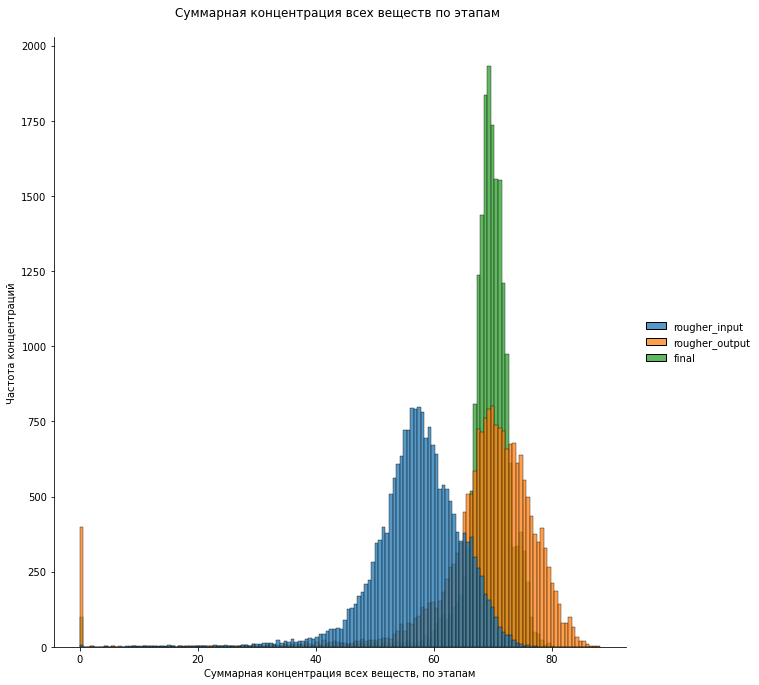

In [27]:
sns.displot(concentrate,kind="hist",height =9)
plt.title('Суммарная концентрация всех веществ по этапам \n')
plt.xlabel('Суммарная концентрация всех веществ, по этапам')
plt.ylabel('Частота концентраций')


Удаление выбросов с нулями в тренировочном наборе

In [28]:
# поиск индексов с пропусками в df_full
index_rougher = rougher_output[rougher_output==0].index
index_final = final[final==0].index
index_with_zero_concentration_full = index_rougher.append(index_final)

# series с датами где нулевая концентрация
date_with_zero_concentration = df_full.iloc[index_with_zero_concentration_full]['date']

df_train = df_train[~df_train['date'].isin(date_with_zero_concentration)]

Анализ по технологискому процессу:
* оценка эффективности обагащения подтверждена теоритическим расчетом;
* рост целевого показателя концетраций золота от этапа к этапу;
* присутствие большого количество нулевых концентраций на последущих этапах обработки сырья, при этом в самой руде значительно меньше нулевых концентраций(возможно причина в точности метода измерения концентраций в руде, нужны уточнения у бизнеса) 

## Модель

Метрика для оценки качества предсказания содержания золотоносной руды SMAPE
Функция sMAPE(симметричное среднее абсолютное процентное отклонение)  

In [29]:
def smape(predict,target):
    return 1/len(predict) * np.sum((np.abs(target-predict)) /((np.abs(target)+np.abs(predict))/2))*100
    

Итоговый SMAPE

In [30]:
def complete_smape(smape_rougher,smape_final):
    total_smape = .25 * smape_rougher + 0.75 * smape_final
    return total_smape

Получение целевых и тренеровчных признаков

In [31]:
# выборки двумя целивыми признаками
features_train = df_train.drop(['rougher.output.recovery','final.output.recovery','date'], axis = 1)
target_train_rougher = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']


features_test = df_test.drop(['rougher.output.recovery','final.output.recovery','date'], axis = 1)
target_test_rougher = df_test['rougher.output.recovery']
target_test_final = df_test['final.output.recovery']

**Подбор модели обучения**

Метрика для оценки модели

In [32]:
score_smape = make_scorer(smape, greater_is_better = False)

Функция для перебора параметров лучшей модели

In [33]:
def best_model(name_model,features,target):
    if name_model == 'lin_reg':
        parameters =  {'fit_intercept':[True,False]}
        grid_model = GridSearchCV(LinearRegression(), parameters,scoring=score_smape, cv=3)
        grid_model.fit(features,target)
        
    if name_model == 'tree':
        parameters_tree = {'max_depth':range(2,20),
                       'min_samples_leaf': range(1,5)
                      }
        grid_model = GridSearchCV(DecisionTreeRegressor(random_state = 12345),parameters_tree,scoring=score_smape,cv=3)
        grid_model.fit(features,target)
    if name_model == 'random_forest':
        parameters = { 'n_estimators': range (1, 10, 1), 
#               'max_depth': range (1,13, 2),
#               'min_samples_leaf': range (1,8),
#               'min_samples_split': range (2,10,2) 
                     }
        grid_model = GridSearchCV(RandomForestRegressor(random_state = 12345), parameters,scoring=score_smape, cv=3)
        grid_model.fit(features,target)
    return grid_model

**Линейная регреcсия**

In [34]:
model_lin_reg_rougher = best_model('lin_reg',features_train,target_train_rougher)
model_lin_reg_rougher_predictions = model_lin_reg_rougher.predict(features_train)
smape_rougher_lin_reg = smape(model_lin_reg_rougher_predictions, target_train_rougher)

model_lin_reg_final = best_model('lin_reg',features_train,target_train_final)
model_lin_reg_final_predictions = model_lin_reg_final.predict(features_train)                                
smape_final_lin_reg = smape(model_lin_reg_final_predictions,target_train_final)
                    


**Дерево решений**

In [35]:
model_tree_rougher = best_model('tree',features_train,target_train_rougher)
model_tree_rougher_predictions = model_tree_rougher.predict(features_train)
smape_rougher_tree = smape(model_tree_rougher_predictions, target_train_rougher)

model_tree_final = best_model('tree',features_train,target_train_final)
model_tree_final_predictions = model_tree_final.predict(features_train) 
smape_final_tree = smape(model_tree_final_predictions,target_train_final)



**Случайный лес**

In [36]:
model_forest_rougher = best_model('random_forest',features_train,target_train_rougher)
model_forest_rougher_predictions = model_forest_rougher.predict(features_train)
smape_rougher_forest = smape(model_forest_rougher_predictions, target_train_rougher)

model_forest_final = best_model('random_forest',features_train,target_train_final)
model_forest_final_predictions = model_forest_final.predict(features_train)
smape_final_forest = smape(model_forest_final_predictions, target_train_final)

**Проверка на адекватность**

In [37]:
dummy_reg = DummyRegressor(strategy = 'median')

dummy_reg.fit(features_train,target_train_rougher) 
dummy_predictions_rougher = dummy_reg.predict(features_train)
smape_dummy_rougher = smape(dummy_predictions_rougher,target_train_rougher)

dummy_reg.fit(features_train,target_train_final) 
dummy_predictions_final = dummy_reg.predict(features_train)
smape_dummy_final = smape(dummy_predictions_final,target_train_final)


In [38]:
df_pivite_metrics_rougher =pd.DataFrame({'линейная регрессия':smape_rougher_lin_reg,
                                 'решающее дерево':smape_rougher_tree,'случайный лес' : smape_rougher_forest,
                                 'предсказание медианой': smape_dummy_rougher
                                },
             index = ['smape_rougher, %'])

df_pivite_metrics_rougher

,линейная регрессия,решающее дерево,случайный лес,предсказание медианой
"smape_rougher, %",4.646065,5.55936,1.135902,7.282148


In [39]:
df_pivite_metrics_final =pd.DataFrame({'линейная регрессия':smape_final_lin_reg,
                                 'решающее дерево':smape_final_tree,'случайный лес' : smape_final_forest,
                                 'предсказание медианой': smape_dummy_final
                                },
             index = ['smape_final, %'])
df_pivite_metrics_final

,линейная регрессия,решающее дерево,случайный лес,предсказание медианой
"smape_final, %",8.106729,8.857333,2.606227,10.19686


**Лучшая модель по метрике SMAPE**

In [40]:
print('Наилучшее значение метрики SMAPE на этапе концентрата у модели: ',df_pivite_metrics_rougher.min().idxmin())
print('Наилучшее значение метрики SMAPE финальном этапе у модели: ',df_pivite_metrics_final.min().idxmin())

Наилучшее значение метрики SMAPE на этапе концентрата у модели:  случайный лес
Наилучшее значение метрики SMAPE финальном этапе у модели:  случайный лес


**Проверка итоговой метрики SMAPE для тестовой выборки для лучших моделей**

In [41]:
predictions_rougher = model_forest_rougher.predict(features_test)
smape_rougher = smape(predictions_rougher,target_test_rougher)

predictions_final = model_forest_final.predict(features_test)
smape_final = smape(predictions_final,target_test_final)

total_smape = complete_smape(smape_rougher,smape_final)


dummy_predictions_rougher = dummy_reg.predict(features_test)
smape_dummy_rougher = smape(dummy_predictions_rougher,target_test_rougher)

dummy_predictions_final = dummy_reg.predict(features_test)
smape_dummy_final = smape(dummy_predictions_final,target_test_final)

dammy_complete_smape = complete_smape(smape_dummy_rougher,smape_dummy_final)

print('Полный SMAPE для лучших моделей:  ',total_smape)
print('Полный SMAPE предсказаный константной моделью:  ',dammy_complete_smape)

Полный SMAPE для лучших моделей:   9.615556069270099
Полный SMAPE предсказаный константной моделью:   14.391190380844776


Вывод:
* Анализ данных подтвердил эффективность обогащения на уровне теоретического расчета
* Выявлены некоторые аномалии (нулевые значения концентрации после обогащения)
* Получена модель машинного обучения позволяющая предсказывать концентрацию содержания золота в руде, лучше замены медианным значением
